### How to run Jupyter server and kernel inside conda environment:
conda create -n my-conda-env........# creates new virtual env
conda activate my-conda-env..........# activate environment in terminal
conda install jupyter...........................# install jupyter + notebook
jupyter notebook.................................# start server + kernel inside environment

#### How to check all the environments in the system
conda info --envs

source :
https://stackoverflow.com/questions/58068818/how-to-use-jupyter-notebooks-in-a-conda-environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Data Understanding & Analysis
draft notebook to understand and visualise data (not main program)

#### 1.1 Data Loading

In [2]:
# a) Loading the Books csv file
df_books = pd.read_csv('csv/Books.csv')
print('data shape:',df_books.shape)
print('Number of unique books:', len(df_books.ISBN.unique()))
print('Number of null values:\n' ,df_books.isnull().sum())
df_books.head()

data shape: (271360, 8)
Number of unique books: 271360
Number of null values:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
print("Columns in df_books with values equal to 0:")
print(df_books.eq(0).sum())

Columns in df_books with values equal to 0:
ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication    3570
Publisher                 0
Image-URL-S               0
Image-URL-M               0
Image-URL-L               0
dtype: int64


In [4]:
# b) Loading the Users csv file
df_users = pd.read_csv('csv/Users.csv')
print('data shape:',df_users.shape)
print('Number of unique users:', len(df_users['User-ID'].unique()))
print('Number of null values:\n' ,df_users.isnull().sum())
df_users.head()

data shape: (278858, 3)
Number of unique users: 278858
Number of null values:
 User-ID          0
Location         0
Age         110762
dtype: int64


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
print("Columns in df_users with values equal to 0:")
print(df_users.eq(0).sum())

Columns in df_users with values equal to 0:
User-ID       0
Location      0
Age         416
dtype: int64


In [6]:
# c) Loading the Ratings csv file
df_ratings = pd.read_csv('csv/Ratings.csv')
print('data shape:', df_ratings.shape)
print('Number of unique rated books:', len(df_ratings.ISBN.unique()))
print('Number of null values:' ,df_ratings.isnull().sum())
df_ratings.head()

data shape: (1149780, 3)
Number of unique rated books: 340556
Number of null values: User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
print("Columns in df_ratings with values equal to 0:")
print(df_ratings.eq(0).sum())

Columns in df_ratings with values equal to 0:
User-ID             0
ISBN                0
Book-Rating    716109
dtype: int64


##### raw data summary
The file "books.csv" or df_books has 271,360 books data
It has 8 columns:
###### ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L

The file "ratings.csv" or df_ratings has 340,556 ratings data for books
It has 3 columns:
###### User-ID, ISBN, Book-Rating

The variable "users" has 278,858 users
It has 3 columns:
###### User-ID, Location, Age

##### things to take note of
- Null authors and publishers found in df_books
- Year-of-Publication, Age, Book-Rating(very large) has values == 0
- Very large number of null age values in df_users, consider dropping

#### 1.2 Univariate EDA &rarr; Exploring df_books

<b>1.2.1 Converting Year of Publication to integer type</b>

In [8]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
#This code is not necessary for the program, so no need run at every instance
#Year-of-publication is stated as object which is incorrect format, so try convert to integer
#Catch and print the error & also iterate through each row to display the problematic data

# error_indexes = []
# try:
#     df_books['Year-Of-Publication']  = df_books['Year-Of-Publication'].astype(int)
# except Exception as e:
#     print('Error >',e)
#     for index, row in df_books.iterrows():
#         try:
#             int(row['Year-Of-Publication'])
#         except ValueError:
#             error_indexes.append(index)
#             print(f"Row {index}: {row['Year-Of-Publication']}")

In [10]:
# a) display problematic data
df_books[(df_books['Year-Of-Publication'] == 'DK Publishing Inc') | (df_books['Year-Of-Publication'] == 'Gallimard')]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [11]:
# formatting issues cause data to be shifted 1 unit to the left
# b) Code to fix the format issue
temp = df_books[(df_books['Year-Of-Publication'] == 'DK Publishing Inc') | (df_books['Year-Of-Publication'] == 'Gallimard')]
authors = []
books_titles = []
error_indexes = pd.Series(list(temp.index))

for title in temp['Book-Title']:
    author = title.split(';')[-1].split('"')[0]
    book = title.split(';')[0].split('\\')[0]
    authors.append(author)
    books_titles.append(book)

temp = pd.concat([temp['ISBN'].to_frame(), temp[df_books.columns[1:]].shift(periods = 1, axis = 1)], axis=1)
temp['Book-Title'] = books_titles
temp['Book-Author'] = authors

df_books.drop(error_indexes, axis=0, inplace=True)

for i in error_indexes:
    error_indexes.loc[i] = list(temp.loc[i].values)

In [12]:
# display the data again to check if it worked
df_books.iloc[[209538, 220731, 221678]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209539,0425170829,X-Men Legends (X-Men),Stan Lee,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425170829.0...,http://images.amazon.com/images/P/0425170829.0...,http://images.amazon.com/images/P/0425170829.0...
220733,3813501361,Der wilde Strom. Eine Reise auf dem Jangtse.,Simon Winchester,2000,Knaus,http://images.amazon.com/images/P/3813501361.0...,http://images.amazon.com/images/P/3813501361.0...,http://images.amazon.com/images/P/3813501361.0...
221681,0673520021,"Brief English Handbook, The",Edward A. Dornan,1997,Addison-Wesley Pub Co,http://images.amazon.com/images/P/0673520021.0...,http://images.amazon.com/images/P/0673520021.0...,http://images.amazon.com/images/P/0673520021.0...


In [13]:
# c) convert Year-Of-Publication to int data type
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)
df_books.drop(labels=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)

print(df_books.dtypes)

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
dtype: object


'Year-Of-Publication' has been changed to integer data type.

For content-based filtering,
A book that user liked or rated highly in the past is recommended a product that is similar to the highly-rated product.

Thus, 'Image-URL-S', 'Image-URL-M' and 'Image-URL-L' are not relevant and has been dropped.

<b>1.2.1 Dealing with invalid values in Year of Publication</b>

In [14]:
# a) Find out all the years of the books in the dataset
year_counts = df_books['Year-Of-Publication'].value_counts().sort_index()

for year, count in zip(year_counts.index.values, year_counts.values):
    print(f"Year: {year}, Count: {count}")

Year: 0, Count: 4618
Year: 1376, Count: 1
Year: 1378, Count: 1
Year: 1806, Count: 1
Year: 1897, Count: 1
Year: 1900, Count: 3
Year: 1901, Count: 7
Year: 1902, Count: 2
Year: 1904, Count: 1
Year: 1906, Count: 1
Year: 1908, Count: 1
Year: 1909, Count: 2
Year: 1910, Count: 1
Year: 1911, Count: 19
Year: 1914, Count: 1
Year: 1917, Count: 1
Year: 1919, Count: 1
Year: 1920, Count: 33
Year: 1921, Count: 2
Year: 1922, Count: 2
Year: 1923, Count: 11
Year: 1924, Count: 2
Year: 1925, Count: 2
Year: 1926, Count: 2
Year: 1927, Count: 2
Year: 1928, Count: 2
Year: 1929, Count: 7
Year: 1930, Count: 13
Year: 1931, Count: 3
Year: 1932, Count: 5
Year: 1933, Count: 4
Year: 1934, Count: 1
Year: 1935, Count: 3
Year: 1936, Count: 7
Year: 1937, Count: 5
Year: 1938, Count: 7
Year: 1939, Count: 9
Year: 1940, Count: 36
Year: 1941, Count: 10
Year: 1942, Count: 14
Year: 1943, Count: 8
Year: 1944, Count: 4
Year: 1945, Count: 8
Year: 1946, Count: 13
Year: 1947, Count: 14
Year: 1948, Count: 9
Year: 1949, Count: 11
Yea

In [15]:
# b) display books with invalid year (>2024)
df_books[df_books['Year-Of-Publication'] > 2024]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books


In [16]:
# c) display books with invalid year (equals 0)
[df_books['Year-Of-Publication'] == 0]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 271355    False
 271356    False
 271357    False
 271358    False
 271359    False
 Name: Year-Of-Publication, Length: 271357, dtype: bool]

There are over 4000 books with publication year 0, and around 12 with year>2024 (input error)
It is possible that books in valid range [0,2024] to have with invalid years, but no way of knowing locally.
It is good practice to replace these books with correct information.
However, since it will not significantly affect the results of the model, it will not be necessary to handle.

<b>1.2.3 Which Author has the Most Books?</b>

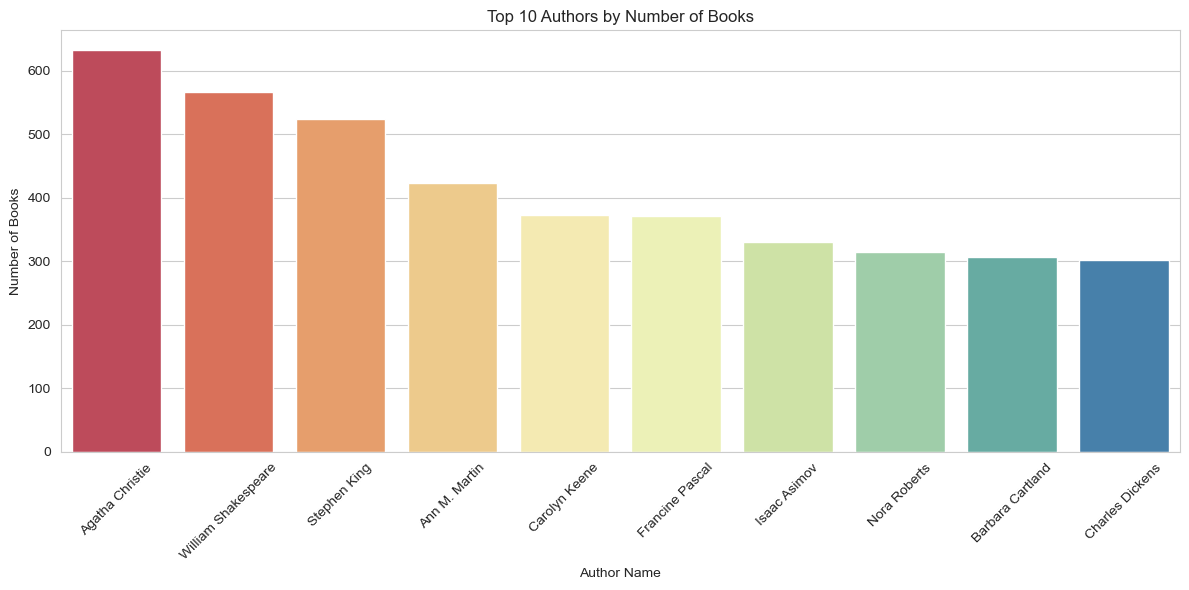

In [17]:
# Group by author and count number of books, Select the top 10, Convert to df for plotting
df_top_10_authors = (df_books['Book-Author'].value_counts()).head(10).reset_index()
df_top_10_authors.columns = ['Author Name', 'Number of Books']

# Seaborn plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Author Name', y='Number of Books', data=df_top_10_authors, palette='Spectral')

plt.xlabel('Author Name')
plt.ylabel('Number of Books')
plt.title('Top 10 Authors by Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### section summary
- 3 data rows with formatting issues has been fixed
- Year-Of-Publication has been converted to integer type
- 3 Image size columns has been dropped as its not relevant

#### 1.2 Univariate EDA &rarr; Exploring df_ratings 

In [18]:
# a) Cleaning step 1 : Remove ratings with invalid book ISBNs
# so only ratings for books that exist in the df_books are kept
print('Number of data before cleaning : {}'.format(len(df_ratings)))
df_ratings = df_ratings[df_ratings['ISBN'].isin(df_books['ISBN'])]
print('Number of data after cleaning : {}'.format(len(df_ratings)))

Number of data before cleaning : 1149780
Number of data after cleaning : 1031132


Ratings tend to be very sparse (contain mostly zero or null values) so quality data is usually collected from a very popular book or a highly engaging user.
Thus, data can be cleaned by enforcing these rules:
- For a book to be credible, it requires at least 10 user ratings
- For a user to be credible, the user must have rated at least 50 books

This filter can also help to minimise total data and reduce memory usage

In [19]:
# b) Cleaning step 2 : Only keep credible users
# summary statistics for books -> calculate number of ratings(count) and average ratings(mean)
f = ['count','mean']
df_books_summary = df_ratings.groupby('ISBN')['Book-Rating'].agg(f)
df_books_summary.index = df_books_summary.index.map(str)
drop_book_list = df_books_summary[df_books_summary['count'] < 10].index

# summary statistics for users -> same steps
df_users_summary = df_ratings.groupby('User-ID')['Book-Rating'].agg(f)
df_users_summary.index = df_users_summary.index.map(int)
drop_users_list = df_users_summary[df_users_summary['count'] < 10].index

# remove ratings for books or users with fewer than 10 ratings
print('Before Filtering: {}'.format(df_ratings.shape))
df_ratings = df_ratings[~df_ratings['ISBN'].isin(drop_book_list)]
df_ratings = df_ratings[~df_ratings['User-ID'].isin(drop_users_list)]
print('After Filtering: {}'.format(df_ratings.shape))

Before Filtering: (1031132, 3)
After Filtering: (428085, 3)


In [20]:
# c) Display the credible users from the cleaned data
pivot_ratings = df_ratings.pivot(index='ISBN',columns='User-ID',values='Book-Rating')
pivot_ratings.iloc[:, :5].head()
# later i will use user id = 8 for the model input

User-ID,8,99,242,243,254
ISBN,,,,,
0002005018,5.0,NaN,NaN,NaN,NaN
0002251760,NaN,NaN,NaN,NaN,NaN
0002255081,NaN,NaN,NaN,NaN,NaN
0002257203,NaN,NaN,NaN,NaN,NaN
0002259834,NaN,NaN,NaN,NaN,NaN


# 2. Model Building

In [22]:
features = ['Book-Author', 'Year-Of-Publication', 'Publisher']
df_books_preprocess = df_books[df_books['ISBN'].isin(df_ratings['ISBN'].unique())].copy()

for feature in features:
    if df_books_preprocess[feature].dtype == 'O':
        df_books_preprocess[feature] = df_books_preprocess[feature].str.replace('\W', '', regex=True)
        df_books_preprocess[feature] = df_books_preprocess[feature].apply(lambda x: str.lower(x))

def create_soup(x):
    return x['Book-Author'] + ' ' + str(x['Year-Of-Publication'])+ ' ' + x['Publisher']

df_books_preprocess['soup'] = df_books_preprocess[features].apply(create_soup, axis = 1)

#### 2.1 Cosine Similarity

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_books_preprocess['soup'])

# Calculate cosinesimilarity matrix based on count_matrix
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [23]:
df2 = df_books_preprocess.reset_index()
indices = pd.Series(df2.index, index=df2['ISBN'])

In [24]:
def recommend_books(ISBN, cosine_sim):
    idx = indices[ISBN]
    # Get pairwise similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort books based on similarity scores and get the 10 most similar books
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    # Get book indices
    book_indices = [i[0] for i in sim_scores]
    return df2[['Book-Title','soup']].iloc[book_indices], sim_scores

def get_recommendations(userid, cosine_sim):
    #userid = str(userid)
    ISBN = df_ratings['ISBN'].loc[df_ratings[df_ratings['User-ID'] == userid]['Book-Rating'].idxmax()]
    recommendation, sim_score = recommend_books(ISBN, cosine_sim)
    df_recommend = pd.DataFrame(recommendation)
    df_recommend['Cosine_Similarity'] = sim_score
    df_recommend['Cosine_Similarity'] = df_recommend['Cosine_Similarity'].apply(lambda x: x[1])
    return df_recommend

In [25]:
pd.concat([df_books[df_books['ISBN'].isin(list(df_ratings[df_ratings['User-ID'] == 8]['ISBN']))].reset_index(drop=True),    df_ratings[df_ratings['User-ID'] == 8]['Book-Rating'].reset_index(drop=True)], axis = 1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,0
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,0


In [26]:
df_recommend = get_recommendations(8, cosine_sim2)
df_recommend

,Book-Title,soup,Cosine_Similarity
15353,Spadework,timothyfindley 2001 harperflamingocanada,0.666667
6,New Vegetarian: Bold and Beautiful Recipes for...,celiabrooksbrown 2001 rylandpetersampsmallltd,0.333333
19,From the Corner of His Eye,deankoontz 2001 bantambooks,0.333333
44,El Senor De Los Anillos: LA Comunidad Del Anil...,jrrtolkien 2001 minotauro,0.333333
45,El Senor De Los Anillos: Las DOS Torres (Lord ...,jrrtolkien 2001 minotauro,0.333333
46,El Senor De Los Anillos: El Retorno Del Rey (T...,jrrtolkien 2001 distribooks,0.333333
49,Fast Women,jennifercrusie 2001 stmartinspress,0.333333
50,Female Intelligence,janeheller 2001 stmartinspress,0.333333
63,Angels &amp; Demons,danbrown 2001 pocketstar,0.333333
75,Before I Say Good-Bye,maryhigginsclark 2001 pocket,0.333333


#### 2.2 Jaccard Distance Similarity

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
import warnings
warnings.filterwarnings('ignore')

def get_recommendations(userid):
    # a) load data
    df_books = pd.read_csv('csv/Books.csv')
    df_ratings = pd.read_csv('csv/Ratings.csv')

    # b) Data cleaning step 1: Fix format issue in year of publication(df_books) and convert to int data type
    authors = []
    books_titles = []
    temp = df_books[(df_books['Year-Of-Publication'] == 'DK Publishing Inc') | (df_books['Year-Of-Publication'] == 'Gallimard')]
    error_indexes = pd.Series(list(temp.index))

    for title in temp['Book-Title']:
        author = title.split(';')[-1].split('"')[0]
        book = title.split(';')[0].split('\\')[0]
        authors.append(author)
        books_titles.append(book)
    temp = pd.concat([temp['ISBN'].to_frame(), temp[df_books.columns[1:]].shift(periods=1, axis=1)], axis=1)
    temp['Book-Title'] = books_titles
    temp['Book-Author'] = authors
    df_books.drop(error_indexes, axis=0, inplace=True)

    for i in error_indexes:
        error_indexes.loc[i] = list(temp.loc[i].values)
    df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)

    # c) Data Cleaning step 2 : Only keep credible users
    f = ['count', 'mean']
    df_books_summary = df_ratings.groupby('ISBN')['Book-Rating'].agg(f)
    df_books_summary.index = df_books_summary.index.map(str)
    drop_book_list = df_books_summary[df_books_summary['count'] < 10].index

    df_users_summary = df_ratings.groupby('User-ID')['Book-Rating'].agg(f)
    df_users_summary.index = df_users_summary.index.map(int)
    drop_users_list = df_users_summary[df_users_summary['count'] < 10].index

    df_ratings = df_ratings[~df_ratings['ISBN'].isin(drop_book_list)]
    df_ratings = df_ratings[~df_ratings['User-ID'].isin(drop_users_list)]

    # d) Preprocess data for model input
    features = ['Book-Author', 'Year-Of-Publication', 'Publisher']
    df_books_preprocess = df_books[df_books['ISBN'].isin(df_ratings['ISBN'].unique())].copy()
    for feature in features:
        if df_books_preprocess[feature].dtype == 'O':
            df_books_preprocess[feature] = df_books_preprocess[feature].str.replace('\W', '', regex=True)
            df_books_preprocess[feature] = df_books_preprocess[feature].apply(lambda x: str.lower(x))

    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(
                        df_books_preprocess['Book-Author'] + ' ' + df_books_preprocess['Year-Of-Publication'].astype(str) + ' ' + df_books_preprocess['Publisher']
                    )                                               # Define the CountVectorizer and fit_transform on the combined text
    
    # Convert count_matrix to dense matrix
    count_matrix_dense = count_matrix.toarray()

    # Calculate Jaccard similarity matrix based on count_matrix_dense
    jaccard_sim = 1 - pairwise_distances(count_matrix_dense, metric='jaccard')

    df2 = df_books_preprocess.reset_index()                         # Reset the index of df_books_preprocess
    indices = pd.Series(df2.index, index=df2['ISBN'])

    # e) Text-similarity Model building: Jaccard Similarity
    def recommend_books(ISBN, jaccard_sim):
        idx = indices[ISBN]
        sim_scores = list(enumerate(jaccard_sim[idx]))               # pairwise similarity scores of all books
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        book_indices = [i[0] for i in sim_scores]
        return df2.iloc[book_indices], sim_scores

    ISBN = df_ratings['ISBN'].loc[df_ratings[df_ratings['User-ID'] == userid]['Book-Rating'].idxmax()] # Get ISBN with highest rating
    recommendation, sim_score = recommend_books(ISBN, jaccard_sim)
    df_recommend = pd.DataFrame(recommendation)                     # Create a DataFrame for recommendations

    return df_recommend

# Jaccard Model Usage: Call the function with the user ID
userid = 8
get_recommendations(userid)


<>:51: SyntaxWarning: invalid escape sequence '\W'
<>:51: SyntaxWarning: invalid escape sequence '\W'
C:\Users\jerom\AppData\Local\Temp\ipykernel_16144\1569934221.py:51: SyntaxWarning: invalid escape sequence '\W'
  df_books_preprocess[feature] = df_books_preprocess[feature].str.replace('\W', '', regex=True)


       index        ISBN                                         Book-Title  \
15354  69955  0002255081                                          Spadework   
6         21  1841721522  New Vegetarian: Bold and Beautiful Recipes for...   
19        46  0553582747                         From the Corner of His Eye   
44        91  8445071408  El Senor De Los Anillos: LA Comunidad Del Anil...   
45        92  8445071769  El Senor De Los Anillos: Las DOS Torres (Lord ...   
46        93  8445071777  El Senor De Los Anillos: El Retorno Del Rey (T...   
49        96  0312252617                                         Fast Women   
50        97  0312261594                                Female Intelligence   
63       118  0671027360                                Angels &amp; Demons   
75       136  0671004573                              Before I Say Good-Bye   

            Book-Author  Year-Of-Publication                Publisher  \
15354    timothyfindley                 2001     harperfl

#### 2.3 Euclidean Distance Similarity

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import warnings
warnings.filterwarnings('ignore')

def get_recommendations(userid):
    # a) load data
    df_books = pd.read_csv('csv/Books.csv')
    df_ratings = pd.read_csv('csv/Ratings.csv')

    # b) Data cleaning step 1: Fix format issue in year of publication(df_books) and convert to int data type
    authors = []
    books_titles = []
    temp = df_books[(df_books['Year-Of-Publication'] == 'DK Publishing Inc') | (df_books['Year-Of-Publication'] == 'Gallimard')]
    error_indexes = pd.Series(list(temp.index))

    for title in temp['Book-Title']:
        author = title.split(';')[-1].split('"')[0]
        book = title.split(';')[0].split('\\')[0]
        authors.append(author)
        books_titles.append(book)
    temp = pd.concat([temp['ISBN'].to_frame(), temp[df_books.columns[1:]].shift(periods=1, axis=1)], axis=1)
    temp['Book-Title'] = books_titles
    temp['Book-Author'] = authors
    df_books.drop(error_indexes, axis=0, inplace=True)

    for i in error_indexes:
        error_indexes.loc[i] = list(temp.loc[i].values)
    df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)

    # c) Data Cleaning step 2 : Only keep credible users
    f = ['count', 'mean']
    df_books_summary = df_ratings.groupby('ISBN')['Book-Rating'].agg(f)
    df_books_summary.index = df_books_summary.index.map(str)
    drop_book_list = df_books_summary[df_books_summary['count'] < 10].index

    df_users_summary = df_ratings.groupby('User-ID')['Book-Rating'].agg(f)
    df_users_summary.index = df_users_summary.index.map(int)
    drop_users_list = df_users_summary[df_users_summary['count'] < 10].index

    df_ratings = df_ratings[~df_ratings['ISBN'].isin(drop_book_list)]
    df_ratings = df_ratings[~df_ratings['User-ID'].isin(drop_users_list)]

    # d) Preprocess data for model input
    features = ['Book-Author', 'Year-Of-Publication', 'Publisher']
    df_books_preprocess = df_books[df_books['ISBN'].isin(df_ratings['ISBN'].unique())].copy()
    for feature in features:
        if df_books_preprocess[feature].dtype == 'O':
            df_books_preprocess[feature] = df_books_preprocess[feature].str.replace('\W', '', regex=True)
            df_books_preprocess[feature] = df_books_preprocess[feature].apply(lambda x: str.lower(x))

    count = CountVectorizer(stop_words='english')
    count_matrix = count.fit_transform(
                        df_books_preprocess['Book-Author'] + ' ' + df_books_preprocess['Year-Of-Publication'].astype(str) + ' ' + df_books_preprocess['Publisher']
                    )                                               # Define the CountVectorizer and fit_transform on the combined text
    euclidean_dist = euclidean_distances(count_matrix, count_matrix)  # Calculate Euclidean distance matrix based on count_matrix
    df2 = df_books_preprocess.reset_index()                         # Reset the index of df_books_preprocess
    indices = pd.Series(df2.index, index=df2['ISBN'])

    # e) Text-similarity Model building: Euclidean Distance
    def recommend_books(ISBN, euclidean_dist):
        idx = indices[ISBN]
        dist_scores = list(enumerate(euclidean_dist[idx]))               # pairwise distance scores of all books
        dist_scores = sorted(dist_scores, key=lambda x: x[1])
        dist_scores = dist_scores[1:11]
        book_indices = [i[0] for i in dist_scores]
        return df2.iloc[book_indices], dist_scores

    ISBN = df_ratings['ISBN'].loc[df_ratings[df_ratings['User-ID'] == userid]['Book-Rating'].idxmax()] # Get ISBN with highest rating
    recommendation, dist_score = recommend_books(ISBN, euclidean_dist)
    df_recommend = pd.DataFrame(recommendation)                     # Create a DataFrame for recommendations

    return df_recommend

# Euclidean Model Usage: Call the function with the user ID
userid = 8
get_recommendations(userid)

,index,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
15354,69955,0002255081,Spadework,timothyfindley,2001,harperflamingocanada,http://images.amazon.com/images/P/0002255081.0...,http://images.amazon.com/images/P/0002255081.0...,http://images.amazon.com/images/P/0002255081.0...
6,21,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,celiabrooksbrown,2001,rylandpetersampsmallltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...
19,46,0553582747,From the Corner of His Eye,deankoontz,2001,bantambooks,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...
44,91,8445071408,El Senor De Los Anillos: LA Comunidad Del Anil...,jrrtolkien,2001,minotauro,http://images.amazon.com/images/P/8445071408.0...,http://images.amazon.com/images/P/8445071408.0...,http://images.amazon.com/images/P/8445071408.0...
45,92,8445071769,El Senor De Los Anillos: Las DOS Torres (Lord ...,jrrtolkien,2001,minotauro,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...,http://images.amazon.com/images/P/8445071769.0...
46,93,8445071777,El Senor De Los Anillos: El Retorno Del Rey (T...,jrrtolkien,2001,distribooks,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...,http://images.amazon.com/images/P/8445071777.0...
49,96,0312252617,Fast Women,jennifercrusie,2001,stmartinspress,http://images.amazon.com/images/P/0312252617.0...,http://images.amazon.com/images/P/0312252617.0...,http://images.amazon.com/images/P/0312252617.0...
50,97,0312261594,Female Intelligence,janeheller,2001,stmartinspress,http://images.amazon.com/images/P/0312261594.0...,http://images.amazon.com/images/P/0312261594.0...,http://images.amazon.com/images/P/0312261594.0...
63,118,0671027360,Angels &amp; Demons,danbrown,2001,pocketstar,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...,http://images.amazon.com/images/P/0671027360.0...
75,136,0671004573,Before I Say Good-Bye,maryhigginsclark,2001,pocket,http://images.amazon.com/images/P/0671004573.0...,http://images.amazon.com/images/P/0671004573.0...,http://images.amazon.com/images/P/0671004573.0...


# 3. Model Evaluation

In [21]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
train_ratings, test_ratings = train_test_split(df_ratings, test_size=0.2, random_state=42)
train_users = train_ratings['User-ID'].unique()
test_users = test_ratings['User-ID'].unique()

# Preprocess data for model input
features = ['Book-Author', 'Year-Of-Publication', 'Publisher']
train_books = df_books[df_books['ISBN'].isin(train_ratings['ISBN'].unique())].copy()
for feature in features:
    if train_books[feature].dtype == 'O':
        train_books[feature] = train_books[feature].str.replace('\W', '', regex=True)
        train_books[feature] = train_books[feature].apply(lambda x: str.lower(x))

train_books['soup'] = train_books['Book-Author'] + ' ' + train_books['Year-Of-Publication'].astype(str) + ' ' + train_books['Publisher']

# Calculate similarity matrices for train data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import pairwise_distances

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(train_books['soup'])

# Cosine similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

# Jaccard similarity
count_matrix_dense = count_matrix.toarray()
jaccard_sim = 1 - pairwise_distances(count_matrix_dense, metric='jaccard')

# Euclidean distance
euclidean_dist = euclidean_distances(count_matrix, count_matrix)

In [22]:
def get_recommendations(df_books, df_ratings, similarity_matrix, test_users):
    recommendations = {}

    df_books_preprocess = df_books[df_books['ISBN'].isin(df_ratings['ISBN'].unique())]
    df_books_preprocess = df_books_preprocess.reset_index(drop=True)
    indices = pd.Series(df_books_preprocess.index, index=df_books_preprocess['ISBN'])

    def recommend_books(ISBN, similarity_matrix):
        if ISBN in indices.index:
            idx = indices[ISBN]
            sim_scores = list(enumerate(similarity_matrix[:, idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
            sim_scores = sim_scores[1:11]  # Get the top 10 most similar books
            book_indices = [i[0] for i in sim_scores]
            return df_books_preprocess.iloc[book_indices]['ISBN'].tolist(), [score[1] for score in sim_scores]
        else:
            return [], []  # Return empty lists if ISBN is not found

    for user_id in test_users:
        user_ratings = df_ratings[df_ratings['User-ID'] == user_id]
        max_rating_idx = user_ratings['Book-Rating'].idxmax()
        ISBN = user_ratings.loc[max_rating_idx, 'ISBN']
        recommendation, _ = recommend_books(ISBN, similarity_matrix)
        recommendations[user_id] = recommendation

    return recommendations

In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate recommendations for test set users using each model
cosine_recommendations = get_recommendations(df_books, df_ratings, cosine_sim, test_users)
jaccard_recommendations = get_recommendations(df_books, df_ratings, jaccard_sim, test_users)
euclidean_recommendations = get_recommendations(df_books, df_ratings, euclidean_dist, test_users)

from sklearn.preprocessing import MultiLabelBinarizer

# Evaluate each model
cosine_precision, cosine_recall, cosine_f1 = [], [], []
jaccard_precision, jaccard_recall, jaccard_f1 = [], [], []
euclidean_precision, euclidean_recall, euclidean_f1 = [], [], []

for user_id in test_users:
    # Get true relevant books for the user
    true_relevant_books = df_ratings.loc[df_ratings['User-ID'] == user_id, 'ISBN'].values

    # Get recommended books from each model
    cosine_recs = cosine_recommendations[user_id]
    jaccard_recs = jaccard_recommendations[user_id]
    euclidean_recs = euclidean_recommendations[user_id]

    # Convert to binary format
    mlb = MultiLabelBinarizer()
    true_relevant_books_binary = mlb.fit_transform([true_relevant_books])
    cosine_recs_binary = mlb.transform([cosine_recs])
    jaccard_recs_binary = mlb.transform([jaccard_recs])
    euclidean_recs_binary = mlb.transform([euclidean_recs])

    # Calculate precision, recall, and F1-score for each model
    cosine_precision.append(precision_score(true_relevant_books_binary, cosine_recs_binary, average='macro'))
    cosine_recall.append(recall_score(true_relevant_books_binary, cosine_recs_binary, average='macro'))
    cosine_f1.append(f1_score(true_relevant_books_binary, cosine_recs_binary, average='macro'))

    jaccard_precision.append(precision_score(true_relevant_books_binary, jaccard_recs_binary, average='macro'))
    jaccard_recall.append(recall_score(true_relevant_books_binary, jaccard_recs_binary, average='macro'))
    jaccard_f1.append(f1_score(true_relevant_books_binary, jaccard_recs_binary, average='macro'))

    euclidean_precision.append(precision_score(true_relevant_books_binary, euclidean_recs_binary, average='macro'))
    euclidean_recall.append(recall_score(true_relevant_books_binary, euclidean_recs_binary, average='macro'))
    euclidean_f1.append(f1_score(true_relevant_books_binary, euclidean_recs_binary, average='macro'))

In [27]:
# Print results
print('Cosine Similarity Model:')
print(f'  Precision: {np.mean(cosine_precision):.5f}, Recall: {np.mean(cosine_recall):.5f}, F1-score: {np.mean(cosine_f1):.5f}')

print('\nJaccard Similarity Model:')
print(f'  Precision: {np.mean(jaccard_precision):.5f}, Recall: {np.mean(jaccard_recall):.5f}, F1-score: {np.mean(jaccard_f1):.5f}')

print('\nEuclidean Distance Model:')
print(f'  Precision: {np.mean(euclidean_precision):.5f}, Recall: {np.mean(euclidean_recall):.5f}, F1-score: {np.mean(euclidean_f1):.5f}')

Cosine Similarity Model:
  Precision: 0.42262, Recall: 0.42262, F1-score: 0.42262

Jaccard Similarity Model:
  Precision: 0.42225, Recall: 0.42225, F1-score: 0.42225

Euclidean Distance Model:
  Precision: 0.20989, Recall: 0.20989, F1-score: 0.20989
